In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

# Series

In [3]:
s = pd.Series(["a", "b", "c"])
print(s)

0    a
1    b
2    c
dtype: object


In [4]:
s = pd.Series(["a", "b", "c"], index=[2,5,8])
print(s)

2    a
5    b
8    c
dtype: object


In [5]:
s = pd.Series({"a": "A", "b": "B", "c": "C"})
print(s)

a    A
b    B
c    C
dtype: object


In [6]:
s = pd.Series(3, index = range(5))
print(s)

0    3
1    3
2    3
3    3
4    3
dtype: int64


## Accessing a Series

In [7]:
days = ["mon", "tue", "wed", "thu", "fri"]
sleephours = [6, 2, 8, 5, 9]
s = pd.Series(sleephours, index=days)

In [8]:
print(s["mon"])

6


In [9]:
s["tue"] = 3

In [10]:
print(s[1])

3


- If a label is not contained, an exception is raised
- Using the get method, a missing label will return None or specified default

In [11]:
days = ["mon", "tue", "wed", "thu", "fri"]
sleephours = [6, 2, 8, 5, 9]
s = pd.Series(sleephours, index=days)

In [12]:
# print(s["sat"])

KeyError: 'sat'

In [13]:
print(s.get('sat'))

None


## Slicing a Series

In [14]:
print(s[-3:])

wed    8
thu    5
fri    9
dtype: int64


In [15]:
print(s["tue":"thu"]) # Slice from Tuesday to Thursday

tue    2
wed    8
thu    5
dtype: int64


- Head and Tail

In [16]:
print(s.head(2))

mon    6
tue    2
dtype: int64


In [17]:
print(s.tail(3))

wed    8
thu    5
fri    9
dtype: int64


- List of Indexes
- You can also explicitly pass a list of positions

In [18]:
print(s[[0,1,2]])

mon    6
tue    2
wed    8
dtype: int64


In [19]:
print(s[["mon", "wed", "fri"]])

mon    6
wed    8
fri    9
dtype: int64


In [20]:
list = ["mon", "wed", "fri"]
print(s[list])

mon    6
wed    8
fri    9
dtype: int64


## Operator Broadcasting

In [21]:
print(s)

mon    6
tue    2
wed    8
thu    5
fri    9
dtype: int64


In [22]:
print(s+1)

mon     7
tue     3
wed     9
thu     6
fri    10
dtype: int64


In [23]:
print(s*2)

mon    12
tue     4
wed    16
thu    10
fri    18
dtype: int64


## Masking and Filtering

In [24]:
print(s)

mon    6
tue    2
wed    8
thu    5
fri    9
dtype: int64


In [25]:
print(s >= 6)

mon     True
tue    False
wed     True
thu    False
fri     True
dtype: bool


In [26]:
print(s[s>=6])

mon    6
wed    8
fri    9
dtype: int64


## Automatic Label Assignments

In [27]:
print(s[1:])

tue    2
wed    8
thu    5
fri    9
dtype: int64


In [28]:
print(s[:-1])

mon    6
tue    2
wed    8
thu    5
dtype: int64


In [29]:
print(s[1:] + s[:-1]) #上面兩個的相加

fri     NaN
mon     NaN
thu    10.0
tue     4.0
wed    16.0
dtype: float64


## Dealing with Missing Values

In [30]:
t = s[1:] + s[:-1]
print(t)

fri     NaN
mon     NaN
thu    10.0
tue     4.0
wed    16.0
dtype: float64


In [31]:
nt = t.dropna()
print(nt)

thu    10.0
tue     4.0
wed    16.0
dtype: float64


In [32]:
zt = t.fillna(0.0)
print(zt)

fri     0.0
mon     0.0
thu    10.0
tue     4.0
wed    16.0
dtype: float64


- Automatic Label Assignment
- assign a fill value to the missing entries of the series to be added

In [33]:
print(s[1:].add(s[:-1], fill_value=0))

fri     9.0
mon     6.0
thu    10.0
tue     4.0
wed    16.0
dtype: float64


## Computing Statistics

In [34]:
print(s)

mon    6
tue    2
wed    8
thu    5
fri    9
dtype: int64


In [35]:
print (s.sum())

30


In [36]:
print(s.prod())

4320


In [37]:
print(s.max())

9


In [38]:
print(s.argmax())

fri


/Users/leosu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


In [39]:
print(s.mean())

6.0


In [40]:
print(s.var())

7.5


In [41]:
print(s.std())

2.7386127875258306


In [42]:
print(s.median())

6.0


In [43]:
print(s.cumsum())

mon     6
tue     8
wed    16
thu    21
fri    30
dtype: int64


In [44]:
print(s.quantile(0.5))

6.0


In [45]:
print(s.quantile([0.25, 0.5, 0.75]))

0.25    5.0
0.50    6.0
0.75    8.0
dtype: float64


In [46]:
print(s[s >= s.quantile(0.5)])

mon    6
wed    8
fri    9
dtype: int64


In [47]:
#Pearson corr.
print(s.corr(s))

1.0


In [48]:
#Spearman corr.
print(s.corr(s, method="spearman"))

0.9999999999999999


In [49]:
#Autocorrelation
#with time lag
print(s.autocorr(lag=0))
print(s.autocorr(lag=1))
print(s.autocorr(lag=2))

1.0
-0.5481281277625191
0.9958705948858225


## desrcibe()

In [50]:
print(s.describe())

count    5.000000
mean     6.000000
std      2.738613
min      2.000000
25%      5.000000
50%      6.000000
75%      8.000000
max      9.000000
dtype: float64


## Series: Plotting

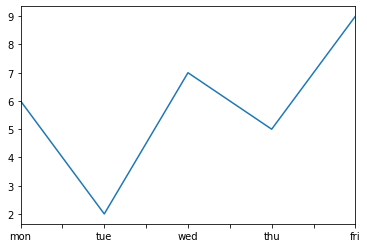

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
sleephours = [6, 2, 7, 5, 9]
days = ["mon", "tue", "wed", "thu", "fri"]
s = pd.Series(sleephours, index=days)
s.plot()
plt.show()

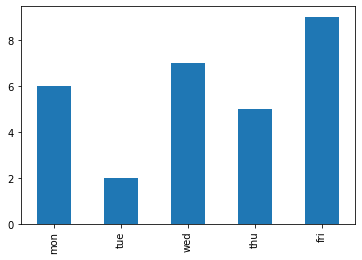

In [52]:
s.plot(kind = "bar")
plt.show()

## DataFrame
- A DataFrame holds three major attributes
    - index: holds the labels of the rows
    - columns: holds the labels of the columns
    - shape: describes the dimension of the table

### Creating a DataFrame from a dictionary of Series

In [53]:
import pandas as pd

In [54]:
d = {"name": pd.Series(["bobby", "ronald", "ronald", "ronald"]),
    "surname": pd.Series(["fisher", "fisher", "reagan", "mcdonald"])}

In [55]:
df = pd.DataFrame(d)

In [56]:
print(df)

     name   surname
0   bobby    fisher
1  ronald    fisher
2  ronald    reagan
3  ronald  mcdonald


In [57]:
print(df.columns)

Index(['name', 'surname'], dtype='object')


In [58]:
print(df.index)

RangeIndex(start=0, stop=4, step=1)


In [59]:
print(df.shape)

(4, 2)


- NaN

In [60]:
d = {"x": pd.Series([0, 0], index=["a", "b"]),
     "y": pd.Series([0, 0], index=["b", "c"])}

In [61]:
df = pd.DataFrame(d)

In [62]:
print(df)

     x    y
a  0.0  NaN
b  0.0  0.0
c  NaN  0.0


In [63]:
print(df.columns)

Index(['x', 'y'], dtype='object')


In [64]:
print(df.index)

Index(['a', 'b', 'c'], dtype='object')


In [65]:
print(df.shape)

(3, 2)


- The columns are taken from the keys
- The index is set to the default one

In [66]:
d = {"column1": [1., 2., 6., -1.],
     "column2": [0., 1., -2., 4.]}

In [67]:
df = pd.DataFrame(d)

In [68]:
print(df)
print(df.columns)
print(df.index)
print(df.shape)

   column1  column2
0      1.0      0.0
1      2.0      1.0
2      6.0     -2.0
3     -1.0      4.0
Index(['column1', 'column2'], dtype='object')
RangeIndex(start=0, stop=4, step=1)
(4, 2)


### Creating a DataFrame from a dictionary of lists, with index

In [69]:
d = {"column1": [1., 2., 6., -1.],
     "column2": [0., 1., -2., 4.]}

In [70]:
df = pd.DataFrame(d, index = ["a", "b", "c", "d"])

In [71]:
print(df)
print(df.columns)
print(df.index)
print(df.shape)

   column1  column2
a      1.0      0.0
b      2.0      1.0
c      6.0     -2.0
d     -1.0      4.0
Index(['column1', 'column2'], dtype='object')
Index(['a', 'b', 'c', 'd'], dtype='object')
(4, 2)


### Creating a DataFrame from *a list of dictionaries*

In [72]:
d = [{"a": 1, "b": 2},
     {"a": 2, "c": 3},]

In [73]:
df = pd.DataFrame(d)

In [74]:
print(df)
print(df.columns)
print(df.index)
print(df.shape)

   a    b    c
0  1  2.0  NaN
1  2  NaN  3.0
Index(['a', 'b', 'c'], dtype='object')
RangeIndex(start=0, stop=2, step=1)
(2, 3)


- The columns are taken form the keys of the dictionaries
- The index is the defualt one

## Loading a CSV file

In [75]:
df = pd.read_csv('iris.csv')

In [76]:
print(df.columns)
print(df.index)
print(df.shape)

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')
RangeIndex(start=0, stop=150, step=1)
(150, 5)


## Extracting Rows and Columns

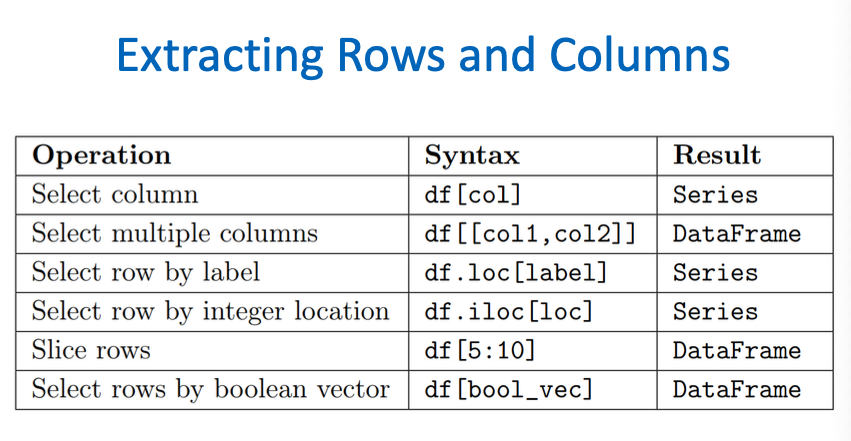

In [77]:
import pandas as pd
import numpy as np
np.random.seed(0)

In [78]:
df = pd.read_csv("iris.csv")

In [79]:
small = df.iloc[np.random.permutation(df.shape[0])].head()
small.columns = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Name"]

In [80]:
print(small.shape)

(5, 5)


In [81]:
print(small)

     SepalLength  SepalWidth  PetalLength  PetalWidth        Name
114          5.8         2.8          5.1         2.4   Virginica
62           6.0         2.2          4.0         1.0  Versicolor
33           5.5         4.2          1.4         0.2      Setosa
107          7.3         2.9          6.3         1.8   Virginica
7            5.0         3.4          1.5         0.2      Setosa


### Extracting a Column

In [82]:
print(small["Name"])

114     Virginica
62     Versicolor
33         Setosa
107     Virginica
7          Setosa
Name: Name, dtype: object


In [83]:
print(small.Name)

114     Virginica
62     Versicolor
33         Setosa
107     Virginica
7          Setosa
Name: Name, dtype: object


- **Extract multiple columns**
- The result is a DataFrame

In [84]:
print(small[ ["SepalLength", "PetalLength"]])

     SepalLength  PetalLength
114          5.8          5.1
62           6.0          4.0
33           5.5          1.4
107          7.3          6.3
7            5.0          1.5


In [85]:
list = ["SepalLength", "PetalLength"]
print(small[list])

     SepalLength  PetalLength
114          5.8          5.1
62           6.0          4.0
33           5.5          1.4
107          7.3          6.3
7            5.0          1.5


### Extracting a Row

- **loc: specifying a label**

In [87]:
print(small.loc[114])

SepalLength          5.8
SepalWidth           2.8
PetalLength          5.1
PetalWidth           2.4
Name           Virginica
Name: 114, dtype: object


- **iloc: specifying a position** 

In [88]:
print(small.iloc[0])

SepalLength          5.8
SepalWidth           2.8
PetalLength          5.1
PetalWidth           2.4
Name           Virginica
Name: 114, dtype: object


- **Extracting Multiple Rows**

In [91]:
print(small.loc[[114, 62, 33]])

     SepalLength  SepalWidth  PetalLength  PetalWidth        Name
114          5.8         2.8          5.1         2.4   Virginica
62           6.0         2.2          4.0         1.0  Versicolor
33           5.5         4.2          1.4         0.2      Setosa


In [92]:
print(small.iloc[[0,1,2]])

     SepalLength  SepalWidth  PetalLength  PetalWidth        Name
114          5.8         2.8          5.1         2.4   Virginica
62           6.0         2.2          4.0         1.0  Versicolor
33           5.5         4.2          1.4         0.2      Setosa


### Broadcasting

In [93]:
print(small["SepalLength"] + small["SepalWidth"])

114     8.6
62      8.2
33      9.7
107    10.2
7       8.4
dtype: float64


In [94]:
print(small + small)

     SepalLength  SepalWidth  PetalLength  PetalWidth                  Name
114         11.6         5.6         10.2         4.8    VirginicaVirginica
62          12.0         4.4          8.0         2.0  VersicolorVersicolor
33          11.0         8.4          2.8         0.4          SetosaSetosa
107         14.6         5.8         12.6         3.6    VirginicaVirginica
7           10.0         6.8          3.0         0.4          SetosaSetosa


### Statistics

In [95]:
print(small.loc[114][:-1].mean()) #Exclude last column, Name

4.0249999999999995


In [96]:
print(small.PetalLength.mean())

3.66


In [97]:
print(small.mean())

SepalLength    5.92
SepalWidth     3.10
PetalLength    3.66
PetalWidth     1.12
dtype: float64


In [100]:
print(small[["Name", "PetalLength", "SepalLength"]][small.PetalLength > small.PetalLength.mean()])

           Name  PetalLength  SepalLength
114   Virginica          5.1          5.8
62   Versicolor          4.0          6.0
107   Virginica          6.3          7.3


### Grouping Tables
- **groupby method**

In [105]:
iris = pd.read_csv("iris.csv")
iris.columns = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth", "Name"]
print(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Name           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [106]:
grouped = iris.groupby(iris.Name)

In [109]:
for group in grouped:
    print(group[0], group[1].shape)

Setosa (50, 5)
Versicolor (50, 5)
Virginica (50, 5)


- Use the **aggregate()** method on the grouped variable. The result is a **dataframe**

In [111]:
iris_mean_by_name = grouped.aggregate(pd.DataFrame.mean)
print(iris_mean_by_name)

            SepalLength  SepalWidth  PetalLength  PetalWidth
Name                                                        
Setosa            5.006       3.428        1.462       0.246
Versicolor        5.936       2.770        4.260       1.326
Virginica         6.588       2.974        5.552       2.026
